In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import math

In [2]:
# Loading data
merchants_df = pd.read_csv("merchants.csv")
offers_df = pd.read_csv("offers.csv")
payment_df = pd.read_csv("payment_plans.csv")

In [3]:
# Inspecting data
print(merchants_df.head())
print(offers_df.head())
print(payment_df.head())
print(merchants_df.describe())
print(offers_df.describe())
print(payment_df.describe())

   merchant_id      Trading Name
0           30     Bright Smiles
1           60       Hill Dental
2           70  Liver Bird Ortho
3           87   Very Nice Teeth
4          149   Miles of Smiles
   loan_id  merchant_id           loan_status offer_created_date  \
0     3292          374  affordability_failed         02/05/2019   
1     5138           60    risk_checks_failed         11/06/2019   
2     5157           60          loan_written         11/06/2019   
3     9206          492       technical_error         14/08/2019   
4     7084          492    risk_checks_failed         12/07/2019   

  offer_confirmed_date  price_of_goods  tabeo_fee  confirmed_month  
0                  NaN          1499.0        NaN              NaN  
1                  NaN          2690.0        NaN              NaN  
2           11/06/2019          2190.0       22.1         201906.0  
3                  NaN          1099.0        NaN              NaN  
4                  NaN          1419.0        Na

In [4]:
offers_df = offers_df.sort_values(by=['offer_created_date'])
offers_df.offer_created_date = offers_df.offer_created_date.apply(lambda x : datetime.strptime(x, '%d/%m/%Y'))
date = offers_df.offer_created_date

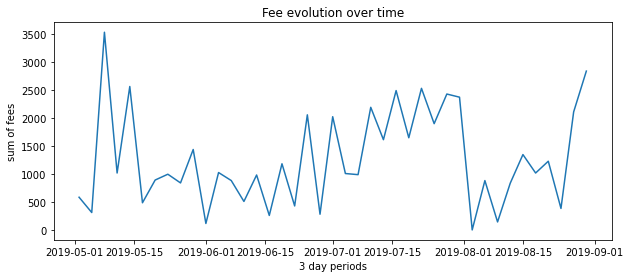

In [5]:
# See how the fees evolve over time
df = (offers_df.assign(date=offers_df.offer_created_date)
        .groupby([pd.Grouper(key='date', freq='3D')])
        .sum()
        .reset_index())
fig, ax1 = plt.subplots()
ax1.set_ylabel('sum of fees')
ax1.set_xlabel('3 day periods')
ax1.set_title("Fee evolution over time")
rounds = df["date"]
ax1.plot(df["date"], df["tabeo_fee"])
fig.set_size_inches(10, 4)
plt.savefig('fig1.png')

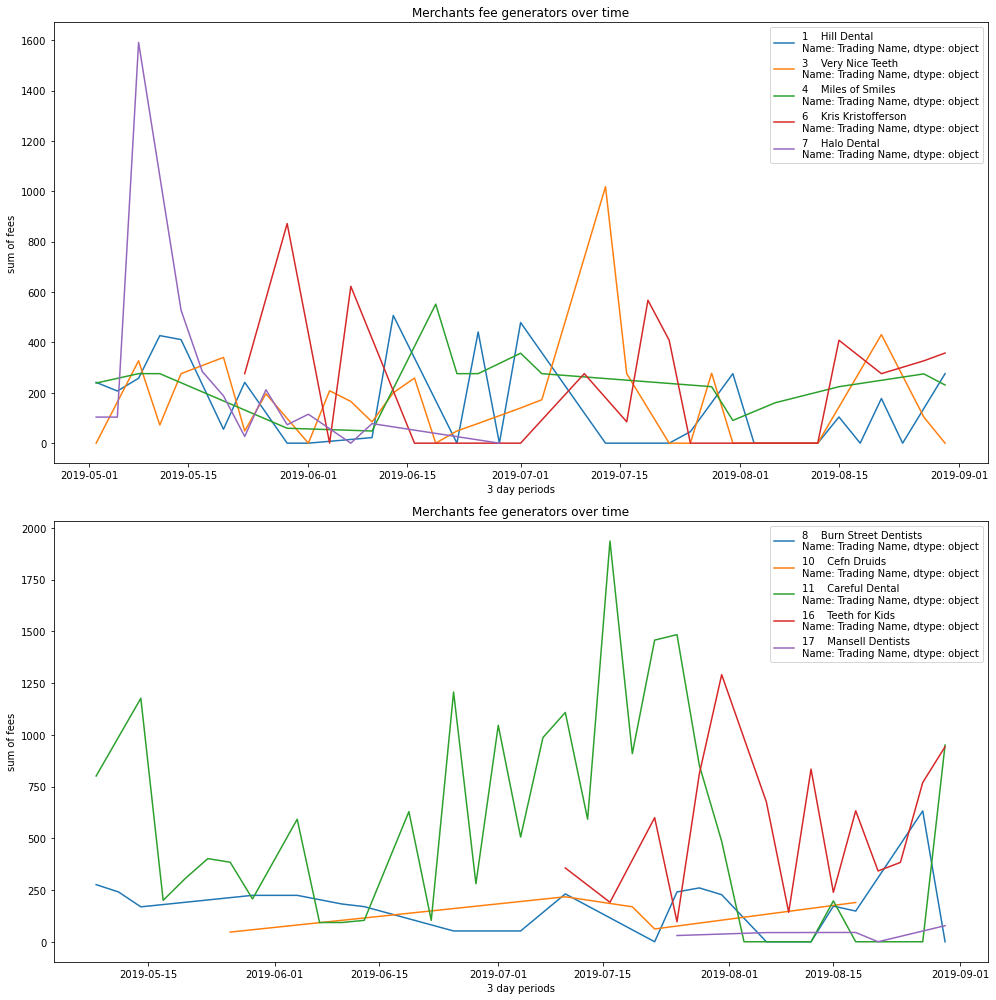

In [6]:
fig, axs = plt.subplots(2, 1)    
fig.set_size_inches(14, 14)

temp = (offers_df.assign(date=offers_df.offer_created_date)
        .groupby(['merchant_id', pd.Grouper(key='date', freq='3D')])
        .sum()
        .reset_index())
    
for i in range(2):
    for id_m in temp.merchant_id[temp.tabeo_fee>0].unique()[5*i:5*(i+1)]:
        axs[i].plot(temp['date'][temp['merchant_id']==id_m], temp['tabeo_fee'][temp['merchant_id']==id_m], label=merchants_df['Trading Name'][merchants_df.merchant_id==id_m]) 
        axs[i].legend()
        axs[i].set_title("Merchants fee generators over time")
        axs[i].set_xlabel('3 day periods')
        axs[i].set_ylabel('sum of fees')
fig.tight_layout()
plt.savefig('fig2.png')

In [7]:
se = set(offers_df.loan_status)
se.remove('loan_written')
status = list(se)

C:\Users\peter\anaconda3\envs\ML_python_course_2020\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


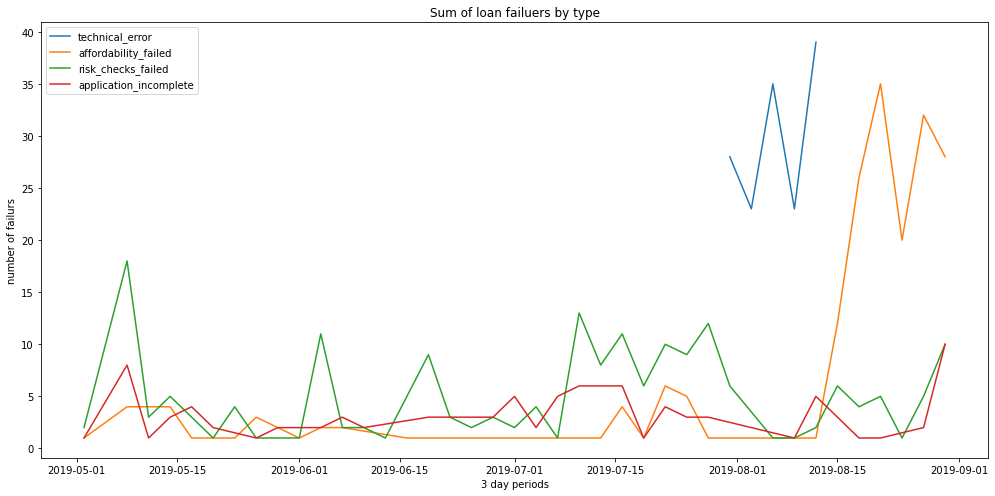

In [8]:
# See how the fees evolve over time
fig, axs = plt.subplots(1, 1)    
fig.set_size_inches(14, 7)
t = offers_df
t['new'] = 0
t['new'][t.offer_confirmed_date.isnull()] = 1

temp2 = (t.assign(date=t.offer_created_date)
        .groupby(['loan_status',pd.Grouper(key='date', freq='3D')])
        .sum()
        .reset_index())

for id_m in status:
    axs.plot(temp2['date'][temp2['loan_status']==id_m], temp2['new'][temp2['loan_status']==id_m], label=id_m) 
    axs.legend()
    axs.set_title("Sum of loan failuers by type")
    axs.set_xlabel('3 day periods')
    axs.set_ylabel('number of failurs')
fig.tight_layout()
plt.savefig('fig3.png')

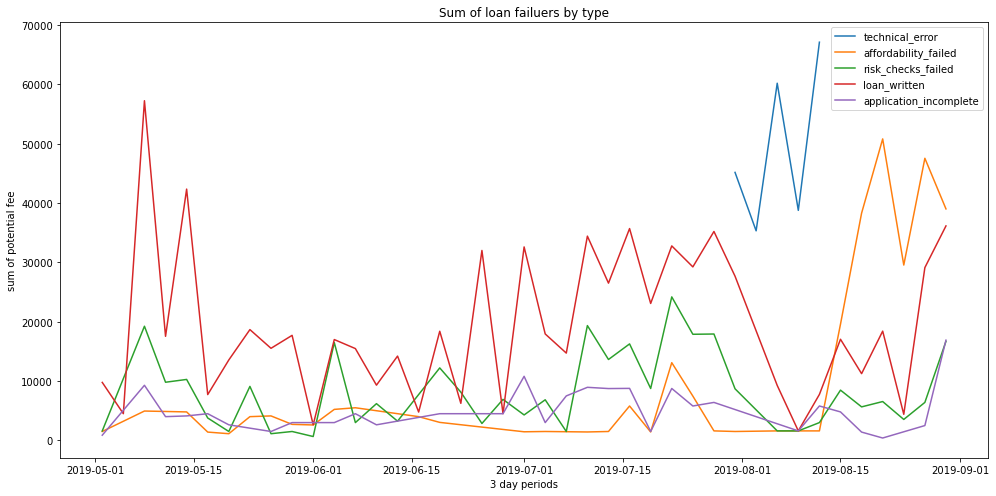

In [9]:
# Dont have time to comment aahhh
fig, axs = plt.subplots(1, 1)    
fig.set_size_inches(14, 7)
temp2 = (t.assign(date=t.offer_created_date)
        .groupby(['loan_status',pd.Grouper(key='date', freq='3D')])
        .sum()
        .reset_index())

for id_m in list(set(offers_df.loan_status)):
    axs.plot(temp2['date'][temp2['loan_status']==id_m], temp2['price_of_goods'][temp2['loan_status']==id_m], label=id_m) 
    axs.legend()
    axs.set_title("Sum of loan failuers by type")
    axs.set_xlabel('3 day periods')
    axs.set_ylabel('sum of potential fee')
fig.tight_layout()
plt.savefig('fig4.png')

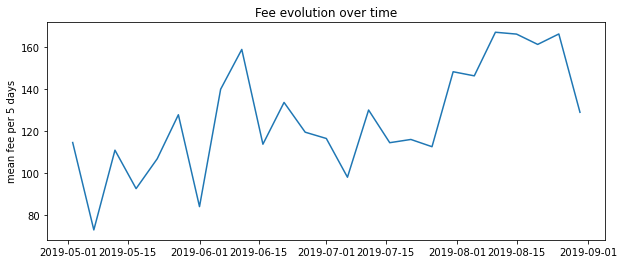

In [10]:
df = (offers_df.assign(date=offers_df.offer_created_date)
        .groupby([pd.Grouper(key='date', freq='5D')])
        .mean()
        .reset_index())
fig, ax1 = plt.subplots()
ax1.set_ylabel('mean fee per 5 days')
ax1.set_title("Fee evolution over time")
rounds = df["date"]
ax1.plot(df["date"], df["tabeo_fee"])
fig.set_size_inches(10, 4)
plt.savefig('fig5.png')